# 0. Introdução

In [ ]:
Á análise abaixo foi feita utilizando dados das tendências de compras de uma loja de varejo
que foram disponibilizados no site www.Kaggle.com

Dúvdas que quero explorar através dessa análise:
    
   - Quais são os itens/categorias mais populares 
   - itens mais populares por faixa etaria
   - Itens mais populares por cada genero
   


    
    

# 1. Carregando Bibiotecas

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregando DataSet

In [12]:
dt = pd.read_csv("shopping_trends_updated.csv")


In [12]:
# verificando as colunas 

dt.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [4]:
dt.describe()



,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [14]:
# Info do DataSet 
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [15]:
# Verificando se há valor nulo no conjunto de dados 
dt.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [16]:
# Verificando se há valor duplicado 
dt.duplicated().sum()

0

# 3. Analisando os Dados Através de Gráficos

Primeira duvida: Quais são os itens/categorias mais populares?

In [13]:
# Contagem de cada categoria
categories_count=dt["Category"].value_counts()
categories_count



Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

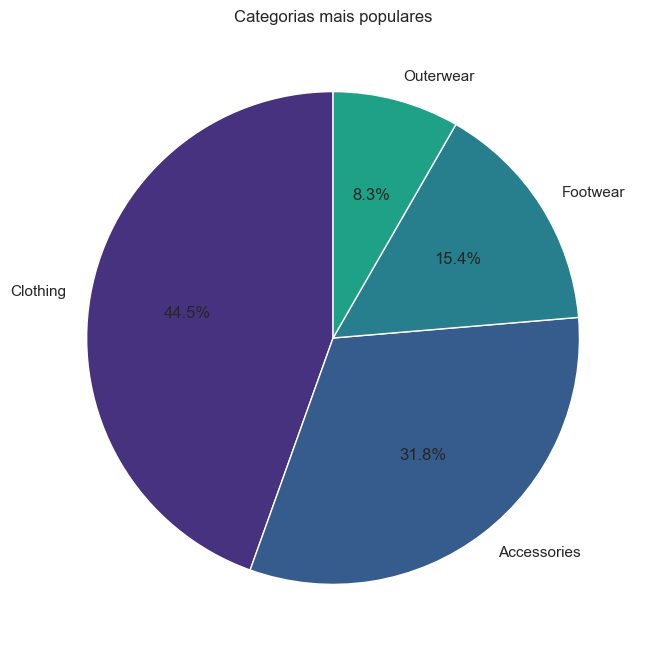

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(categories_count, labels=categories_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title('Categorias mais populares')
plt.show()



Como podemos ver no Gráfico de setores acima as Roupas lidera sendo a categoria mais popular com 44.5%, logo depois vem os acessorios com 31.8%

In [15]:
# Contagem de itens comprados
items_count=dt["Item Purchased"].value_counts()
items_count

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

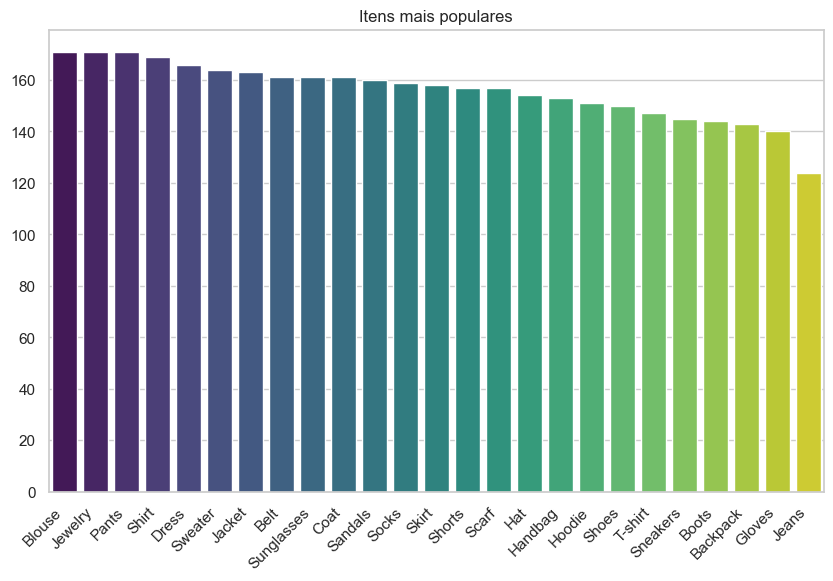

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=items_count.index, y=items_count.values, palette="viridis")
plt.title('Itens mais populares')
plt.xticks(rotation=45, ha='right')  
plt.show()


Analisando o grafico acima percebemos que nao existe uma disparidade entre os itens ja que Blusas,Joias e Calças lideram o grafico.


Segunda duvida: Identificar itens mais populares por faixa etaria


In [17]:
grouped_data = dt.groupby(['Age', 'Item Purchased']).size().reset_index(name='Count')
grouped_data

,Age,Item Purchased,Count
0,18,Backpack,1
1,18,Belt,2
2,18,Blouse,2
3,18,Boots,3
4,18,Coat,5
...,...,...,...
1245,70,Skirt,2
1246,70,Sneakers,4
1247,70,Socks,7
1248,70,Sweater,4


In [18]:
bins = [18, 25, 35, 45, 60, 100]  
labels = ['18-25', '26-35', '36-45', '46-60', '60+']

dt['Age Group'] = pd.cut(dt['Age'], bins=bins, labels=labels, right=False)
dt['Age Group']

0       46-60
1       18-25
2       46-60
3       18-25
4       46-60
        ...  
3895    36-45
3896    46-60
3897    46-60
3898    36-45
3899    46-60
Name: Age Group, Length: 3900, dtype: category
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-60' < '60+']

In [19]:
# Criando uma nova coluna para definir faixa etaria
grouped_data = dt.groupby(['Age Group', 'Item Purchased']).size().reset_index(name='Count')
grouped_data


,Age Group,Item Purchased,Count
0,18-25,Backpack,12
1,18-25,Belt,24
2,18-25,Blouse,20
3,18-25,Boots,12
4,18-25,Coat,27
...,...,...,...
120,60+,Sneakers,23
121,60+,Socks,38
122,60+,Sunglasses,32
123,60+,Sweater,33


In [21]:
grouped_data = dt.groupby(['Age Group', 'Item Purchased']).size().reset_index(name='Count')
grouped_data


,Age Group,Item Purchased,Count
0,18-25,Backpack,12
1,18-25,Belt,24
2,18-25,Blouse,20
3,18-25,Boots,12
4,18-25,Coat,27
...,...,...,...
120,60+,Sneakers,23
121,60+,Socks,38
122,60+,Sunglasses,32
123,60+,Sweater,33


In [20]:
idx = grouped_data.groupby('Age Group')['Count'].idxmax()

itens_mais_comprados= grouped_data.loc[idx]
display(itens_mais_comprados)



,Age Group,Item Purchased,Count
23,18-25,Sweater,29
25,26-35,Backpack,40
63,36-45,Pants,43
79,46-60,Coat,55
112,60+,Jewelry,48


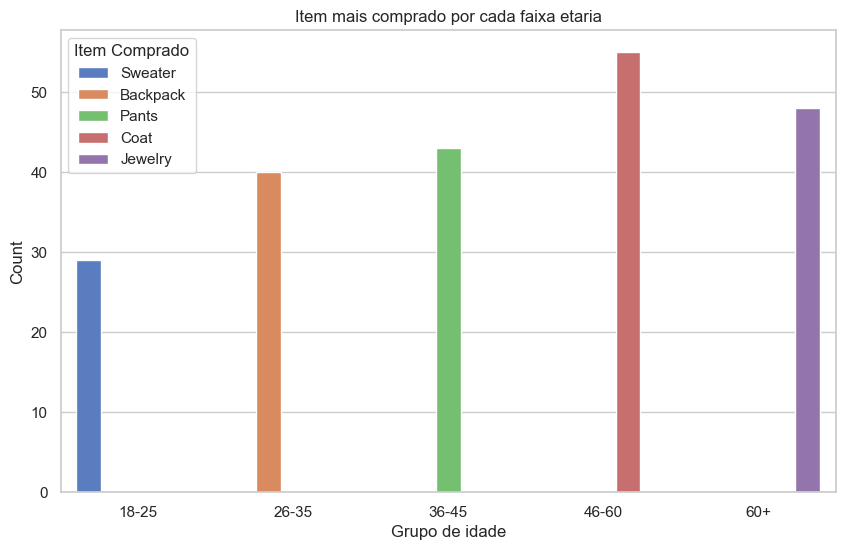

In [29]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Count', hue='Item Purchased', data=itens_mais_comprados)
plt.title('Item mais comprado por cada faixa etaria')
plt.xlabel('Grupo de idade')
plt.legend(title='Item Comprado', title_fontsize='12')
plt.show()





Ao analisar o gráfico, podemos observar que os itens mais comprados variam de acordo com a faixa etária dos consumidores. No grupo de 18 a 25 anos, o produto mais adquirido é o "Sweater" (suéter). Entre os indivíduos de 26 a 35 anos, a preferência recai sobre a "Backpack" (mochila). Na faixa etária de 36 a 45 anos, o destaque vai para as "Pants" (calças). Já entre os consumidores de 46 a 60 anos, o item mais comprado é o "Coat" (casaco), enquanto na faixa etária acima de 60 anos, a preferência recai sobre "Jewelry" (joias). Estes insights demonstram como as escolhas de compra estão relacionadas à idade e podem ser úteis para direcionar estratégias de marketing e estoque de produtos.

Terceira Duvida: Itens mais populares por cada genero


In [31]:
grouped_data = dt.groupby(['Gender', 'Item Purchased']).size().reset_index(name='Count')
grouped_data

,Gender,Item Purchased,Count
0,Female,Backpack,37
1,Female,Belt,55
2,Female,Blouse,66
3,Female,Boots,50
4,Female,Coat,47
5,Female,Dress,52
6,Female,Gloves,37
7,Female,Handbag,58
8,Female,Hat,52
9,Female,Hoodie,51


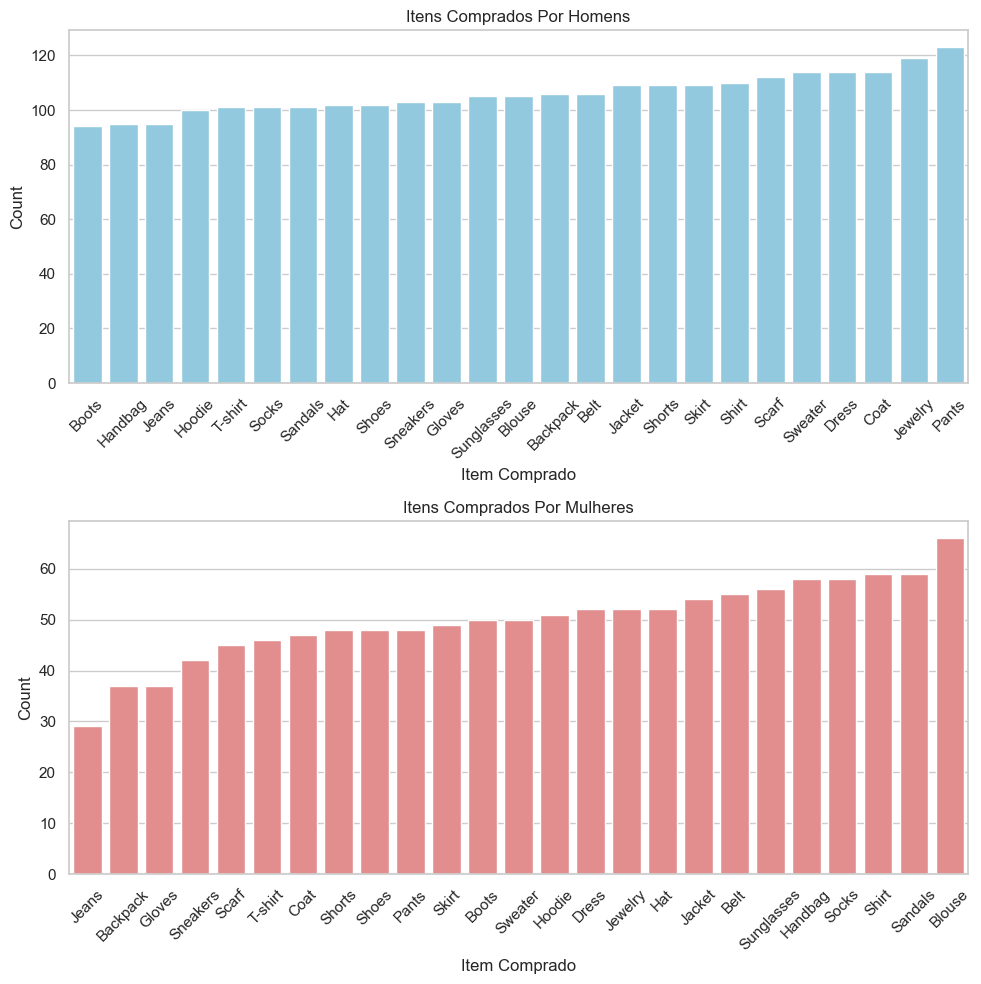

In [37]:
sns.set(style="whitegrid", palette="muted")

fig, axes = plt.subplots(nrows=2, figsize=(10, 10), sharex=False)


male_data = grouped_data[grouped_data['Gender'] == 'Male'].sort_values(by='Count')
female_data = grouped_data[grouped_data['Gender'] == 'Female'].sort_values(by='Count')

sns.barplot(ax=axes[0], x='Item Purchased', y='Count', data=male_data, color='skyblue')
axes[0].set_title('Itens Comprados Por Homens')
axes[0].set_xlabel('Item Comprado')
axes[0].tick_params(axis='x', rotation=45)  

sns.barplot(ax=axes[1], x='Item Purchased', y='Count', data=female_data, color='lightcoral')
axes[1].set_title('Itens Comprados Por Mulheres')
axes[1].set_xlabel('Item Comprado')
axes[1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()


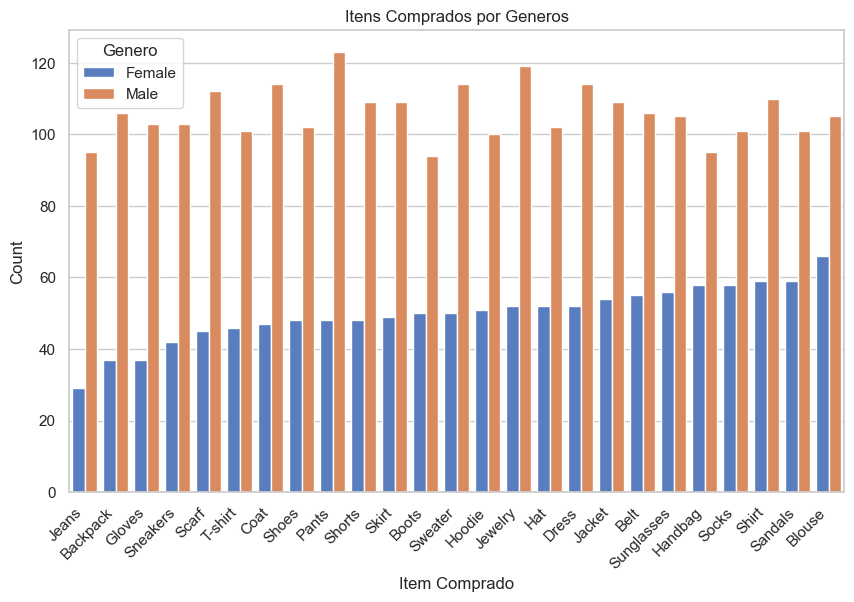

In [38]:
# Criando um só grafico para comparar os dois generos

grouped_data = grouped_data.sort_values(by='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='Count', hue='Gender', data=grouped_data)
plt.title('Itens Comprados por Generos')
plt.xlabel('Item Comprado')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genero', title_fontsize='12')
plt.show()

Na primeira etapa da análise, observamos dois gráficos que representam as preferências de compra entre gêneros diferentes. No gráfico do gênero masculino, "Pants" (calças) lidera as vendas, seguido de "Jewelry" (joias). Enquanto isso, no gráfico do gênero feminino, "Blouse" (blusa) é o item mais vendido, seguido por "Shirt" (camisa) e "Sandals" (sandálias). Esses dados revelam claramente diferenças nas preferências de compra entre homens e mulheres na primeira etapa da análise.


Na segunda etapa da análise, um novo gráfico destaca uma disparidade significativa nas vendas entre gêneros, onde o gênero feminino supera amplamente o gênero masculino em todos os itens. Isso indica que, independentemente do produto, as vendas para o gênero feminino são substancialmente maiores do que para o gênero masculino. Essa disparidade pode ser explorada para orientar estratégias de marketing e estoque, visando a maximização dos lucros, considerando as preferências de compra distintas entre gêneros.

Neste projeto, como iniciante na análise de dados com Python, Comecei por coletar dados relevantes do varejo e utilizei ferramentas e bibliotecas Python para processar, analisar e visualizar essas informações. 

Este projeto também me permitiu compreender a importância da análise de dados no setor varejista e como as informações extraídas podem ser usadas para tomar decisões informadas. À medida que continuo a aprimorar minhas habilidades e conhecimentos, estou ansioso para enfrentar desafios mais complexos e contribuir de forma mais significativa para análises de dados futuras. Este é apenas o começo da minha jornada na análise de dados, e estou empolgado para continuar crescendo e explorando esse campo fascinante.




